<a href="https://colab.research.google.com/github/adinwritescode/FFTBall/blob/main/Playoff_Projection_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

For those of you who havent seen this before, just hover over each block below and click the "Play" button.



## To Do

1. Weight recent weeks more heavily
2. Performance vs Weekly Average?

Current wins data includes up to week 10

In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from IPython.display import clear_output


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('FFTBall All-Time Records').worksheet('Total Points Accumulated 2017-2021')
rows = worksheet.get("B69:K82")


df = pd.DataFrame.from_records(rows).dropna()
df.columns = worksheet.get("B1:K1")
df = df.astype(float)

In [ ]:
avgs = df.mean(axis=0)
std_devs = df.std(axis=0)

games_left = [["Adin", "Lehman"], ["Dean", "Eli"], ["Taub", "Chazin"], ["Ari", "Jamie"], ["Sammy", "Jared"], # week 11
              ["Adin", "Sammy"], ["Lehman", "Taub"], ["Jamie", "Chazin"], ["Ari", "Eli"], ["Dean", "Jared"], # 12
              ["Adin", "Dean"], ["Chazin", "Eli"], ["Taub", "Jamie"], ["Ari", "Jared"], ["Sammy", "Lehman"], # 13
              ["Adin", "Ari"], ["Dean", "Taub"], ["Sammy", "Chazin"], ["Jared", "Jamie"], ["Eli", "Lehman"]] # 14

east = ["Eli", "Chazin", "Taub", "Jamie", "Ari"]
west = ["Adin", "Dean", "Jared", "Sammy", "Lehman"]
league = east + west

def simulate(N = 10000):
  seeds = {owner: [] for owner in league}

  for _ in range(N):
    init_wins = {"Adin": 6, "Chazin": 6, "Jared": 5, "Eli": 5, "Ari": 2, "Dean": 7, "Taub": 3, "Lehman": 6, "Sammy": 7, "Jamie": 3}
    init_pts = df.sum(axis=0)
    for [t1, t2] in games_left:
      p1 = np.random.normal(avgs[t1], std_devs[t1])
      p2 = np.random.normal(avgs[t2], std_devs[t2])
      init_pts[t1] += p1
      init_pts[t2] += p2

      if (p1 > p2):
        init_wins[t1] += 1
      elif (p2 > p1):
        init_wins[t2] += 1
      else:
        print(p1, p2)
        print("Holy shit a tie happened that's so unlucky")

    wins = {k: v for k, v in sorted(init_wins.items(), key=lambda item: (item[1], init_pts[item[0]]), reverse=True)}

    W = E = 0
    for i, standing in enumerate(wins.items()):
      [name, finish] = standing

      if name in west and not W:
        if E:
          seeds[name].append(2)
        else:
          seeds[name].append(1)
        W = 1
      elif name in east and not E:
        if W:
          seeds[name].append(2)
        else:
          seeds[name].append(1)
        E = 1
      elif W and E:
        seeds[name].append(i + 1)
      else:
        seeds[name].append(i+2)
      
  return seeds


Showing projected results for Eli
Best Possible Seed: 1 with probability 3.4%
Worst Possible Seed: 9 with probability 0.0%


Eli makes the playoffs 95.9% of the time and misses the playoffs 4.1% of the time
The most likely outcome is having the 2 seed, which happens 74.0% of the time.




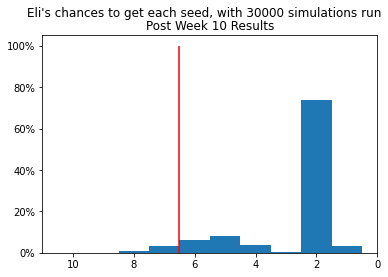


Showing projected results for Chazin
Best Possible Seed: 1 with probability 0.3%
Worst Possible Seed: 9 with probability 1.8%


Chazin makes the playoffs 72.6% of the time and misses the playoffs 27.4% of the time
The most likely outcome is having the 5 seed, which happens 23.2% of the time.




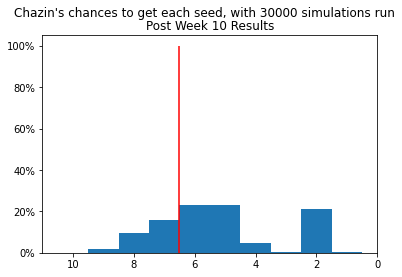


Showing projected results for Taub
Best Possible Seed: 2 with probability 0.1%
Worst Possible Seed: 10 with probability 2.4%


Taub makes the playoffs 7.0% of the time and misses the playoffs 93.0% of the time
The most likely outcome is having the 9 seed, which happens 64.1% of the time.




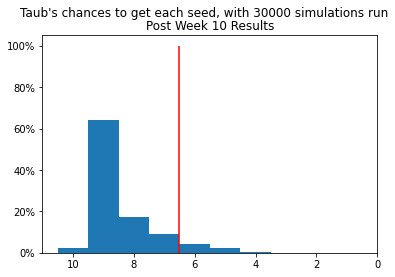


Showing projected results for Jamie
Best Possible Seed: 2 with probability 1.0%
Worst Possible Seed: 10 with probability 1.4%


Jamie makes the playoffs 23.5% of the time and misses the playoffs 76.5% of the time
The most likely outcome is having the 8 seed, which happens 34.5% of the time.




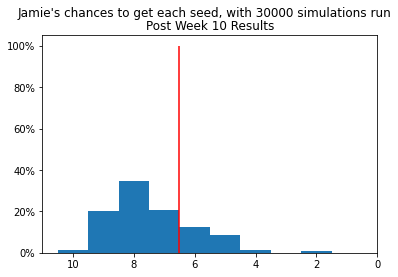


Showing projected results for Ari
Best Possible Seed: 7 with probability 0.0%
Worst Possible Seed: 10 with probability 96.1%


Ari makes the playoffs 0.0% of the time and misses the playoffs 100.0% of the time
The most likely outcome is having the 10 seed, which happens 96.1% of the time.




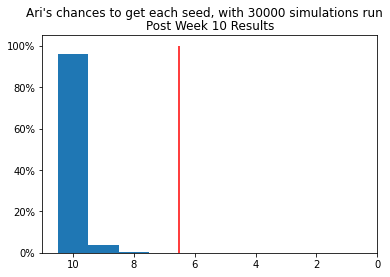


Showing projected results for Adin
Best Possible Seed: 1 with probability 3.5%
Worst Possible Seed: 9 with probability 0.1%


Adin makes the playoffs 96.1% of the time and misses the playoffs 3.9% of the time
The most likely outcome is having the 4 seed, which happens 56.5% of the time.




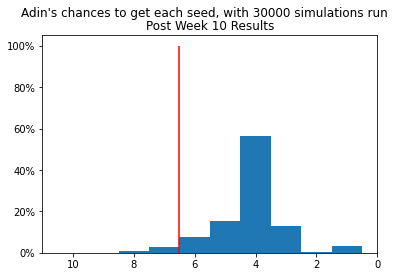


Showing projected results for Dean
Best Possible Seed: 1 with probability 24.1%
Worst Possible Seed: 7 with probability 0.2%


Dean makes the playoffs 99.8% of the time and misses the playoffs 0.2% of the time
The most likely outcome is having the 3 seed, which happens 59.9% of the time.




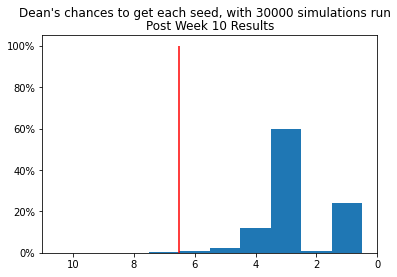


Showing projected results for Jared
Best Possible Seed: 1 with probability 0.0%
Worst Possible Seed: 10 with probability 0.1%


Jared makes the playoffs 51.3% of the time and misses the playoffs 48.7% of the time
The most likely outcome is having the 6 seed, which happens 22.2% of the time.




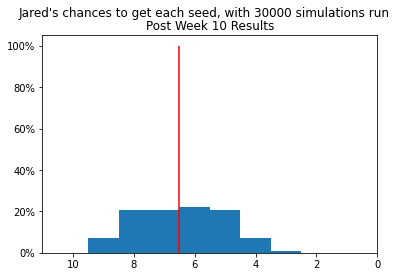


Showing projected results for Sammy
Best Possible Seed: 1 with probability 68.4%
Worst Possible Seed: 7 with probability 0.1%


Sammy makes the playoffs 99.9% of the time and misses the playoffs 0.1% of the time
The most likely outcome is having the 1 seed, which happens 68.4% of the time.




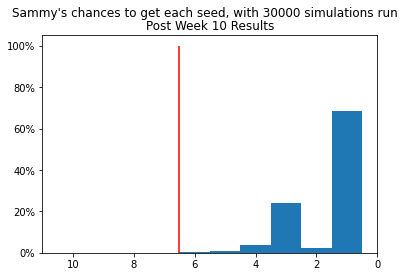


Showing projected results for Lehman
Best Possible Seed: 1 with probability 0.2%
Worst Possible Seed: 9 with probability 3.1%


Lehman makes the playoffs 53.9% of the time and misses the playoffs 46.1% of the time
The most likely outcome is having the 7 seed, which happens 27.1% of the time.




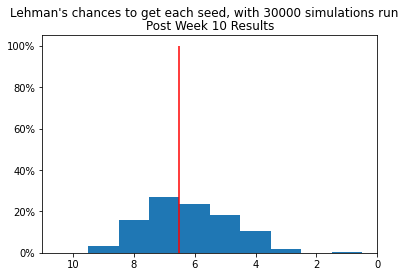

In [82]:
N = 30000
results = simulate(N)


# print("Whose playoff distribution do you want to see?\n")
# print("0: Eli\n1: Chazin\n2: Taub\n3: Jamie\n4: Ari\n5: Adin\n6: Dean\n7: Jared\n8: Sammy\n9: Lehman\n")

# owner = int(input("Insert number corresponding to who you want to see:\n"))


for owner in league:
  #owner = list(results.keys())[owner]
  print("\nShowing projected results for", owner)
  hist_data = results[owner]
  #clear_output(wait=True)
  fig, axs = plt.subplots()
  # We can set the number of bins with the *bins* keyword argument.
  counts, bins, bars = axs.hist(hist_data, bins=np.arange(1,12)-.5, weights=np.ones(N) / N)

  worst = max(hist_data)
  best =  min(hist_data)
  print("Best Possible Seed:", best, "with probability", '{:.1%}'.format(counts[best - 1]))
  print("Worst Possible Seed:", worst, "with probability", '{:.1%}'.format(counts[worst - 1]))
  print("\n")
  print(owner, "makes the playoffs", '{:.1%}'.format(sum(counts[:6])), "of the time and misses the playoffs", '{:.1%}'.format(sum(counts[6:])), "of the time")
  most_likely = max(counts)
  print("The most likely outcome is having the", list(counts).index(most_likely) + 1, "seed, which happens", '{:.1%}'.format(most_likely), "of the time.\n\n")


  axs.invert_xaxis()
  plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
  plt.suptitle(f"{owner}'s chances to get each seed, with {N} simulations run")
  plt.title("Post Week 10 Results")
  plt.vlines(x=6.5, ymin=0, ymax=1, color = 'r')
  plt.show()

  #print("Do you want to see someone else's distribution?\n")
  #print("0: Eli\n1: Chazin\n2: Taub\n3: Jamie\n4: Ari\n5: Adin\n6: Dean\n7: Jared\n8: Sammy\n9: Lehman\n")

  #owner = int(input())


In [81]:
print("Lehman's probs:")
print("4:", results["Lehman"].count(4) / N, "\n5:", results["Lehman"].count(5) / N, "\n6:", results["Lehman"].count(6) / N)
print("Jared's probs:")
print("4:", results["Jared"].count(4) / N, "\n5:", results["Jared"].count(5) / N, "\n6:", results["Jared"].count(6) / N)
print("Chazin's probs:")
print("4:", results["Chazin"].count(4) / N, "\n5:", results["Chazin"].count(5) / N, "\n6:", results["Chazin"].count(6) / N)

Lehman's probs:
4: 0.1063 
5: 0.18366666666666667 
6: 0.235
Jared's probs:
4: 0.07506666666666667 
5: 0.20503333333333335 
6: 0.22273333333333334
Chazin's probs:
4: 0.047 
5: 0.22903333333333334 
6: 0.22506666666666666
